# Logistic Regression——Step by Step

假设有一个二分类问题,输出为$y∈{0,1}$,而线性回归模型产生的预测值为$z=w^Tx+b$是实数值,希望有一个理想的阶跃函数来帮我们实现$z$值到$0/1$的转化.

$$\phi(x)=
\begin{cases}
0& \text{z<0}\\
0.5& \text{z=0}\\
1& \text{z>0}
\end{cases}$$

但是,该函数不连续,我们是希望一个单调可微的函数,因此就找到了Sigmoid function来替代。

$$g(z)=\frac{1}{1+e^{-z}}$$

假设：  
  $$h_{\theta}(x)=g({\theta}^Tx)$$ 
  $$g(z)=\frac{1}{1+e^{-z}}$$
  * g(z)称为sigmoid函数
  * y的取值范围是(0,1)
  * $h_{\theta}(x)>=0.5$,$y$输出1
  * 否则如果$h_{\theta}(x)<0.5$,$y$输出0
  
  ![sigmoid](img/sigmoid.png)
  
  回顾线性回归的代价函数:   
  $$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}cost(h_{\theta}(x^{(i)}),y)$$
  $$cost(h_{\theta}(x),y)=\frac{1}{2}(h_{\theta}(x)-y)^2$$
  
  逻辑回归采用的是`sigmoid函数`,如果直接采用上面的代价函数,那么J(θ )将会是非凸函数,无法用梯度下降进行求解。
  ![cost](img/costJSig.png)

### 代价函数
  定义`Logistic cost function`为:
  
 $$cost(h_{\theta}(x),y)=
\begin{cases}
-log(h_{\theta}(x))& \text{y=1}\\
-log(1-h_{\theta}(x))& \text{y=0}
\end{cases}$$
  ![cost](img/logJ1.png)
* 当`y=1`时,预测正确时($h_θ(x)=1$)代价为零,反之预测错误时($h_θ(x)=0$)的代价非常大。
![cost](img/logJ2.png)
* 当`y=0`时($h_θ(x)=0$)代价函数为0,反之预测错误时($h_θ(x)=1$)代价则非常大。

为了计算方便,将分段的函数合起来：
$$cost(h_{\theta}(x),y)=-ylog(h_{\theta(x)})-(1-y)log(1-h_{\theta}(x))$$
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(h_{\theta}(x^{(i)}))+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))$$


### 梯度下降
定了代价函数,问题转化成求最小值的问题——利用梯度下降
* 参数的更新方式：
$$\theta_{j}=\theta_{j}-\alpha\frac{\partial}{\partial\theta_j}J(\theta)$$

* 对J(θ))的偏导数为:
$$\frac{\partial}{\partial\theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_j^{(i)}$$

* 即：
$$\theta_{j}=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_j^{(i)}$$
注：假设函数为Sigmoid 函 数 ,为何偏导数的结果完全和线性归回一模一样?，自行去证明，利用符合函数的链式法则。

#### 问题：我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。
假设你是一个大学招生的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  读取数据

In [49]:
import os
path = 'data/ex2data1.txt'
pdData = pd.read_csv(path, header=None, 
                     names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 数据可视化

Text(0, 0.5, 'Exam 2 Score')

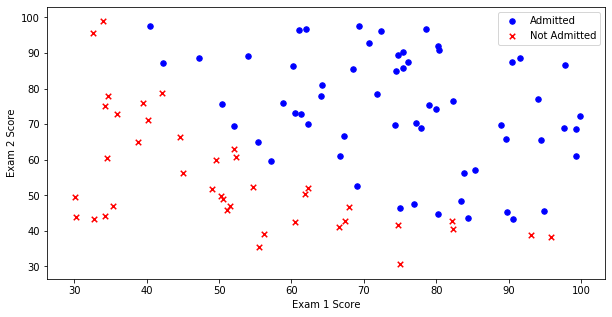

In [50]:
#返回标注为“1”的行，训练中的正样本
positive = pdData[pdData['Admitted'] == 1]
#返回标注为“0”的行，训练中的正样本
negative = pdData[pdData['Admitted'] == 0] 

#绘散列图
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], 
           s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], 
           s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## 定义模型

$$g(z)=\frac{1}{(1+e^{-z})}$$

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

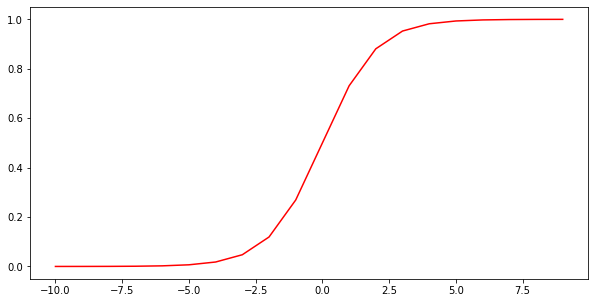

In [52]:
#生成20个数据点，范围从[-10, 10]
nums = np.arange(-10, 10, step=1) 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(nums, sigmoid(nums), 'r')

In [53]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [54]:
#增加try...excetp防止多次运行insert报错
try:
    pdData.insert(0, 'Ones', 1)  #向量化，增加常数列1
except:
    pass

#分别得到训练数据的X和y
orig_data = pdData.as_matrix()
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

C:\Users\liang\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [55]:
X.shape, y.shape

((100, 3), (100, 1))

In [56]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [57]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

## 初始化参数

In [58]:
theta = np.zeros([1, 3])

In [59]:
theta

array([[0., 0., 0.]])

## 定义代价函数(Cost Function)


$$J(\theta)=-\frac{1}{m}\sum\limits_{i=1}^{m}y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))$$

In [60]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [61]:
cost(X, y, theta)

0.6931471805599453

## 计算梯度

$$\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum\limits_{i=1}^{m}(y_i - h_\theta(x_i))x_{ij}$$

In [62]:
#计算梯度
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    #for each parmeter
    for j in range(len(theta.ravel())): 
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

In [63]:
#比较3中不同梯度下降方法

STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

## 获取数据

In [64]:
import numpy.random

def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

## 梯度下降

In [65]:
import time

#梯度下降求解
def descent(data, theta, batchSize, stopType, thresh, alpha):
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)  #计算梯度
        k += batchSize                   # 取batch数量个数据
        if k >= n:                       # n为训练集的大小
            k = 0 
            X, y = shuffleData(data)     # 重新获取数据
        theta = theta - alpha*grad       # 参数更新
        costs.append(cost(X, y, theta))  # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh): 
            break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [66]:
def runSGD(data, theta, batchSize, stopType, thresh, alpha):
    theta = np.zeros([1, 3])
    #梯度下降
    theta, iter, costs, grad, dur = descent(
        data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    #三种梯度下降算法
    if batchSize==n: 
        strDescType = "Gradient"   #批量梯度下降
    elif batchSize==1:  
        strDescType = "Stochastic" #随机梯度下降
    else: 
        strDescType = "Mini-batch ({})".format(batchSize) #小批量梯度下降
        
    name += strDescType + " descent - Stop: "
    
    #三种停止迭代的条件
    if stopType == STOP_ITER: 
        strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: 
        strStop = "costs change < {}".format(thresh)
    else: 
        strStop = "gradient norm < {}".format(thresh)
        
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    
    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.78s


array([[-0.00027127,  0.00705232,  0.00376711]])

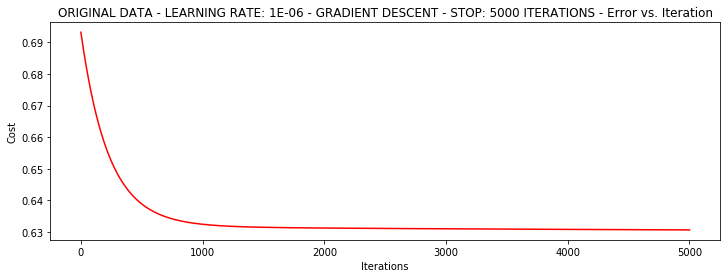

In [67]:
#批量梯度下降
n=100
runSGD(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 38.04s


array([[-5.13364014,  0.04771429,  0.04072397]])

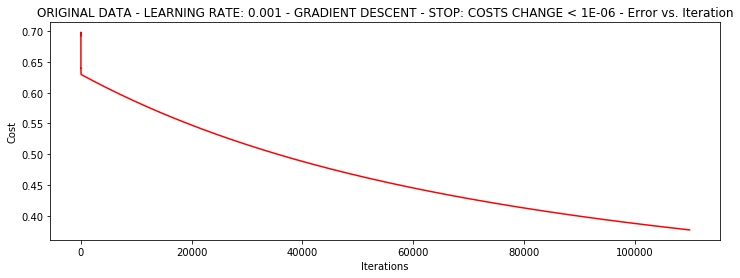

In [68]:
#根据损失值停止
#设定阈值 1E-6, 差不多需要110 000次迭代
runSGD(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 13.30s


array([[-2.37033409,  0.02721692,  0.01899456]])

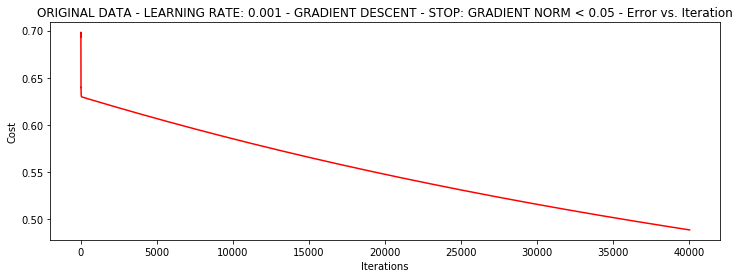

In [22]:
#根据梯度变化停止
#设定阈值 0.05,差不多需要40 000次迭代
runSGD(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38744947  0.11214537  0.017287  ]] - Iter: 5000 - Last cost: 2.56 - Duration: 0.43s


array([[-0.38744947,  0.11214537,  0.017287  ]])

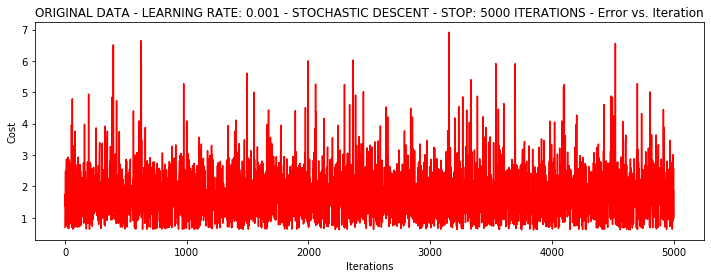

In [23]:
#随机梯度下降
runSGD(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202441  0.00982531  0.00076601]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.35s


array([[-0.00202441,  0.00982531,  0.00076601]])

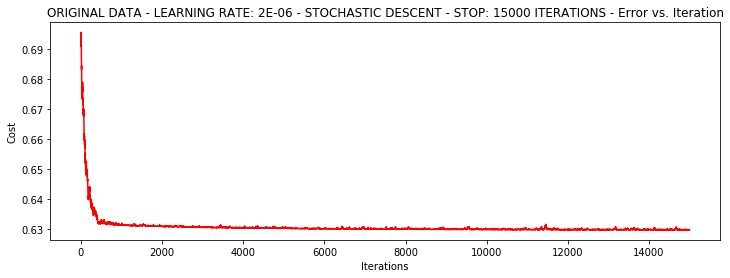

In [24]:
#很不稳定,试试把学习率调小一些
runSGD(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

### 结论：随机梯度下降速度快，但稳定性差，需要很小的学习率

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.03811865e+00  1.70684983e-02 -6.96533896e-05]] - Iter: 15000 - Last cost: 0.61 - Duration: 1.85s


array([[-1.03811865e+00,  1.70684983e-02, -6.96533896e-05]])

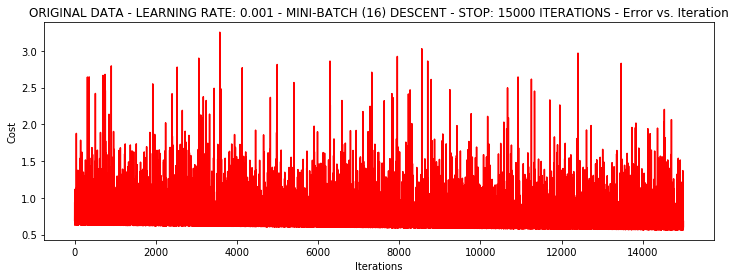

In [25]:
#小批量梯度下降
runSGD(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

***Original data - learning rate: 1e-05 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-0.01040848  0.01092213  0.00024637]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.84s


array([[-0.01040848,  0.01092213,  0.00024637]])

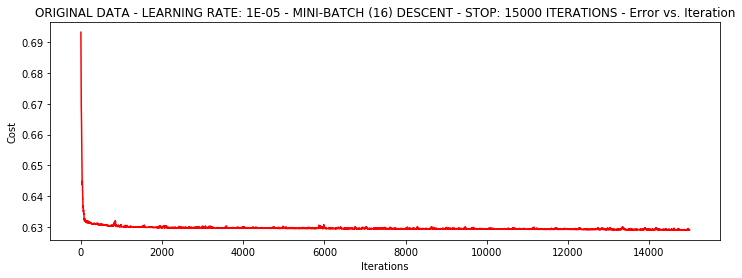

In [26]:
#小批量梯度下降，降低learning rate
runSGD(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.00001)

浮动仍然比较大，我们来尝试下对数据进行标准化 将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

## 特征缩放

In [27]:
scaled_data = orig_data.copy()
scaled_data[:, 1:3] =(orig_data[:,1:3] - orig_data[:,1:3].mean()) / orig_data[:,1:3].std()


***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.30866314 0.86394389 0.77481473]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.95s


array([[0.30866314, 0.86394389, 0.77481473]])

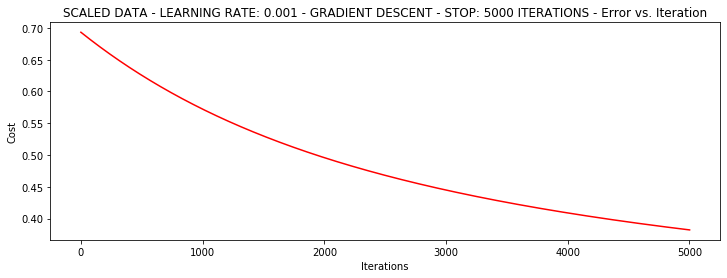

In [28]:
runSGD(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

结果好多了！原始数据，只能达到达到0.61，而这里到了0.38！ 所以对数据做预处理是非常重要的

In [32]:
orig_data[0:5]

array([[ 1.        , 52.34800399, 60.76950526,  0.        ],
       [ 1.        , 32.72283304, 43.30717306,  0.        ],
       [ 1.        , 69.36458876, 97.71869196,  1.        ],
       [ 1.        , 61.37928945, 72.80788731,  1.        ],
       [ 1.        , 38.7858038 , 64.99568096,  0.        ]])

In [33]:
scaled_data[0:5]

array([[ 1.        , -1.4339105 , -0.04951598,  0.        ],
       [ 1.        ,  0.45211211,  0.9989238 ,  1.        ],
       [ 1.        , -0.82644884, -0.85190562,  0.        ],
       [ 1.        , -0.55201603, -1.60373072,  0.        ],
       [ 1.        ,  1.52655806, -1.06900632,  1.        ]])

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[1.07208926 2.5761258  2.46403839]] - Iter: 59405 - Last cost: 0.22 - Duration: 22.82s


array([[1.07208926, 2.5761258 , 2.46403839]])

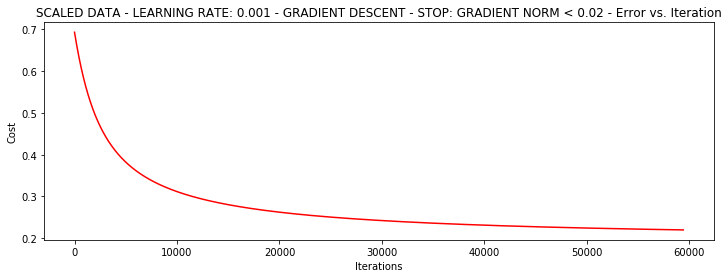

In [34]:
runSGD(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

### 更多的迭代次数会使得损失下降的更多！

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[1.15232051 2.73513778 2.62691936]] - Iter: 72760 - Last cost: 0.22 - Duration: 8.52s


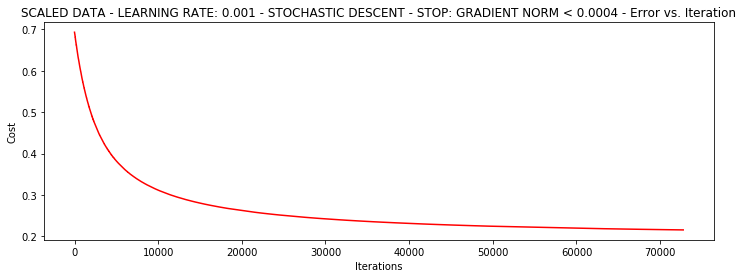

In [35]:
theta = runSGD(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

###  随机梯度下降更快，但是需要迭代的次数也更多，所以还是用batch的比较合适。


***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[1.11710001 2.67503789 2.56239088]] - Iter: 67150 - Last cost: 0.22 - Duration: 10.48s


array([[1.11710001, 2.67503789, 2.56239088]])

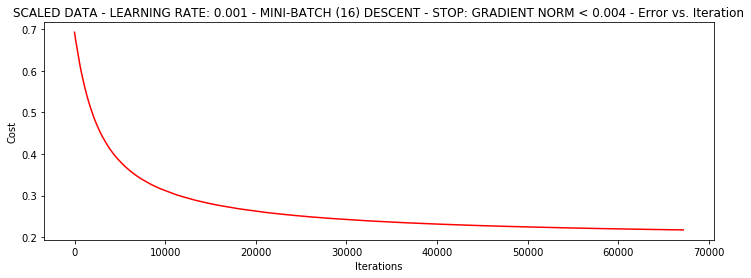

In [36]:
runSGD(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

## 绘制决策边界

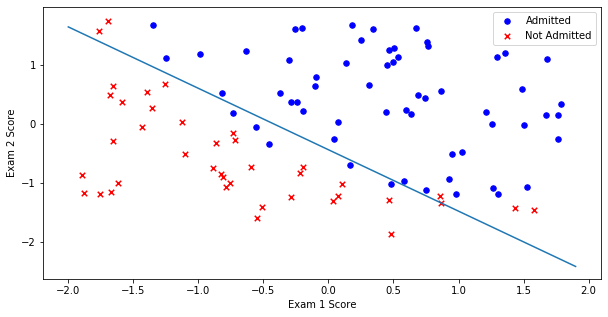

In [37]:
#返回标注为“1”的行，训练中的正样本
positive = scaled_data[scaled_data[:,3] == 1]
#返回标注为“0”的行，训练中的正样本
negative = scaled_data[scaled_data[:,3] == 0] 

#绘散列图
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive[:,1], positive[:,2], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative[:,1], negative[:,2], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
x = np.arange(-2.0, 2.0, 0.1)
y = (-theta[0][0] - theta[0][1] * x)/theta[0][2]
ax.plot(x,y)

## 预测

In [38]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

## 精度

In [39]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


## Regularized Logistic Regression
下面用一个例子来看看正则化的Logistic回归，假定芯片厂的两次不同的检验来判断芯片是否合格，我们需要一些芯片检验的历史数据，然后建立Logistic回归模型来进行预测。

### 读取数据
读取数据，并绘制数据散列图。

Text(0, 0.5, 'Test 2 Score')

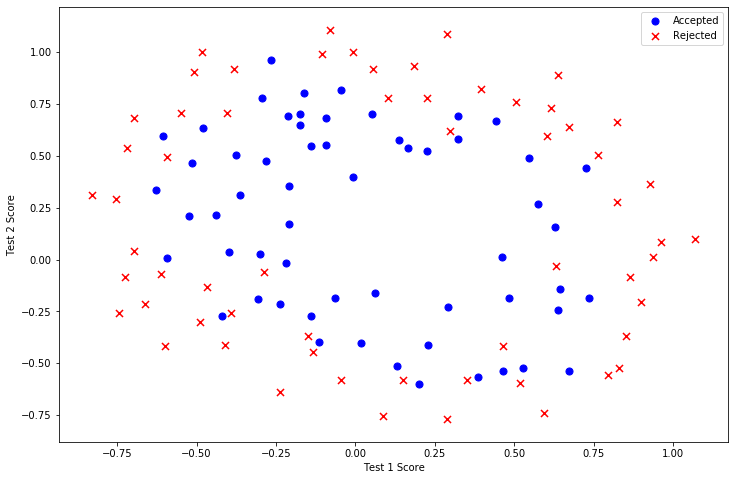

In [40]:
path = 'data/ex2data2.txt'
data2 = pd.read_csv(path, header=None, 
                    names=['Test 1', 'Test 2', 'Accepted'])

positive = data2[data2['Accepted'].isin([1])]  
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Test 1'], positive['Test 2'], 
           s=50, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test 1'], negative['Test 2'], 
           s=50, c='r', marker='x', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')

In [41]:
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### 构造多项式特征

数据比前面的例子稍微有点复杂，不能用直线决策边界来划分数据，一种处理方法利用类似的Logistic回归的线性技巧，构造原特征的多项式特征。

In [42]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1',axis=1, inplace=True)
data2.drop('Test 2',axis=1, inplace=True)
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


### 重新定义代价函数
需要定义代正则化的代价函数，在之前的代价函数前面增加正则化参数

In [43]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    #正则化项
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

reg是一个正则化项，是关于参数的函数，当参数值增大，则加在代价函数的惩罚变大，learningRate来调整调整reg的。

In [44]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i==0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad

In [45]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)
learningRate = 1
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

可以利用Scipy包里面的函数来优化模型参数

In [46]:
import scipy.optimize as opt
result2 = opt.fmin_tnc(func=costReg, x0=theta2, 
                       fprime=gradientReg, args=(X2, y2, learningRate))

result2

(array([ 1.22702519e-04,  7.19894617e-05, -3.74156201e-04, -1.44256427e-04,
         2.93165088e-05, -5.64160786e-05, -1.02826485e-04, -2.83150432e-04,
         6.47297947e-07, -1.99697568e-04, -1.68479583e-05]), 96, 1)

计算一下训练的准确度：

In [47]:
theta_min = np.matrix(result2[0])
predictions = predict(X2, theta_min)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) 
           else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 77%
